In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 15
form = 'linear_nav_1_90_data'
name = 'final'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [5]:
filename = os.path.join(dirs, "{0}.feather".format(form,name))
filename

'./records/cicso0/ims/temp/model/200037/15/linear_nav_1_90_data.feather'

In [6]:
predict_data = pd.read_feather(filename)
predict_data#.head()

,trade_time,code,predict,nxt1_ret_15h
0,2024-12-04 10:43:00,IM,0.536584,-0.003063
1,2024-12-04 10:44:00,IM,0.534086,-0.000925
2,2024-12-04 10:45:00,IM,0.532771,-0.000435
3,2024-12-04 10:46:00,IM,0.531836,-0.001175
4,2024-12-04 10:47:00,IM,0.530724,-0.001559
...,...,...,...,...
15283,2025-03-12 14:56:00,IM,0.234191,-0.007669
15284,2025-03-12 14:57:00,IM,0.209338,-0.009878
15285,2025-03-12 14:58:00,IM,0.180858,-0.009747
15286,2025-03-12 14:59:00,IM,0.148502,-0.008376


In [7]:
#is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
#predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.tail()

,trade_time,code,predict,nxt1_ret_15h
15283,2025-03-12 14:56:00,IM,0.234191,-0.007669
15284,2025-03-12 14:57:00,IM,0.209338,-0.009878
15285,2025-03-12 14:58:00,IM,0.180858,-0.009747
15286,2025-03-12 14:59:00,IM,0.148502,-0.008376
15287,2025-03-12 15:00:00,IM,0.120100,-0.007579


In [8]:
from lib.cux001 import FactorEvaluate1

In [27]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.0,
                                scale_method='raw',
                                resampling_win=15,
                                expression="{0}_{1}".format(form, name))

In [28]:
stats_dt = evaluate1.run()

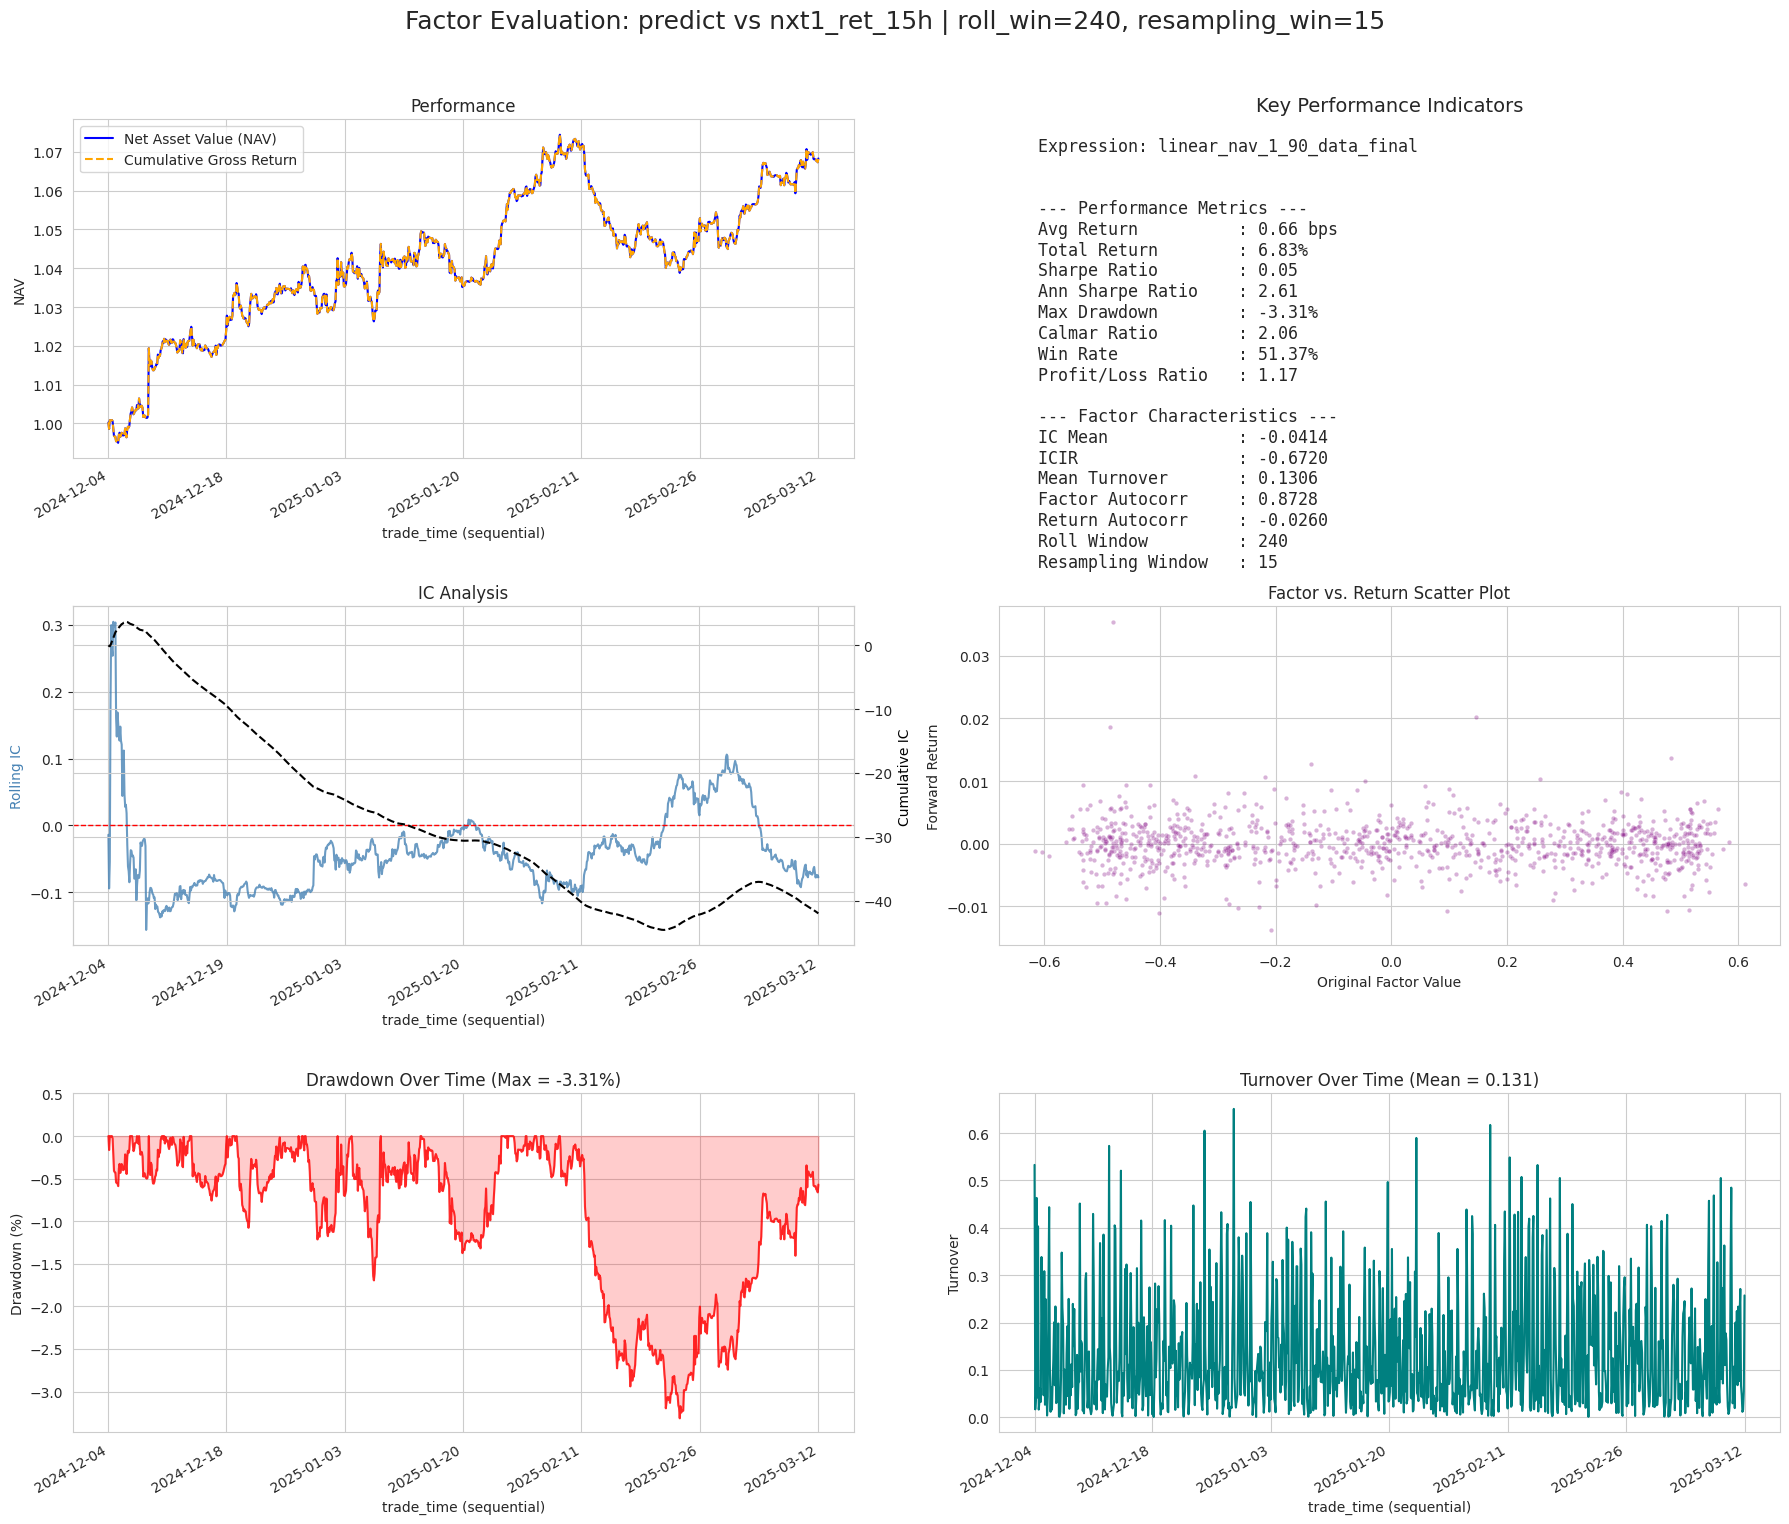

In [29]:
evaluate1.plot_results()

In [42]:
f1 = evaluate1.factor_data

In [45]:
f2 = evaluate1.factor_data

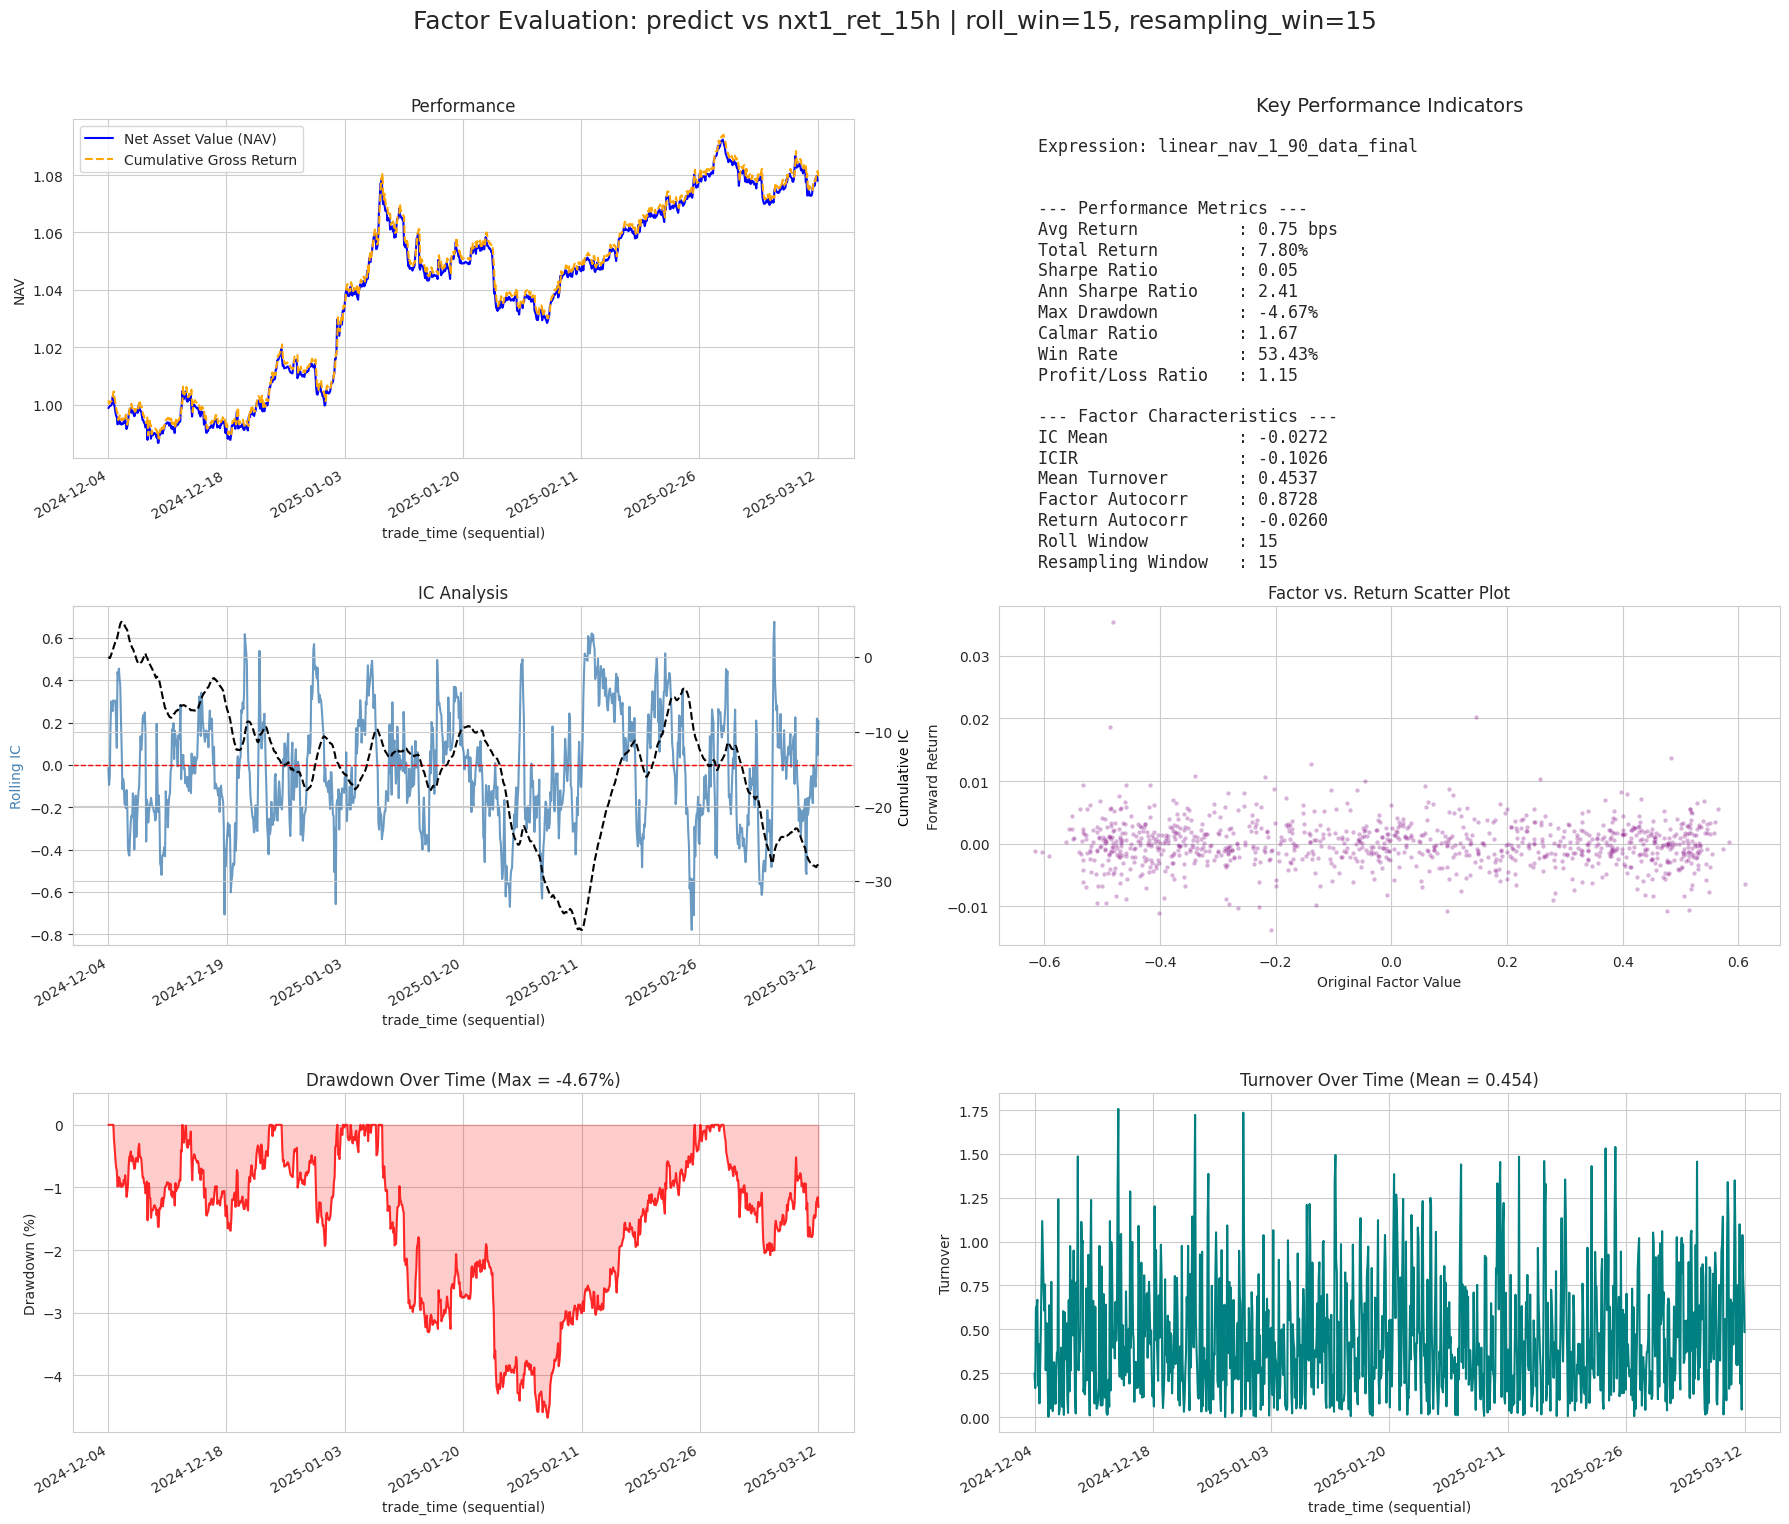

In [50]:
evaluate1.plot_results()

In [46]:
f1

,predict,nxt1_ret_15h,f_scaled,ic,cumsum_ic,pos,gross_ret,turnover,net_ret,nav
trade_time,,,,,,,,,,
2024-12-04 10:45:00,0.532771,-0.000435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-04 11:00:00,0.516083,0.003173,NaN,NaN,NaN,0.487586,0.001547,NaN,NaN,NaN
2024-12-04 11:15:00,0.472358,-0.004742,NaN,NaN,NaN,0.239529,-0.001136,0.248057,-0.001136,0.998864
2024-12-04 11:30:00,0.009308,0.001003,NaN,NaN,NaN,0.404583,0.000406,0.165054,0.000406,0.999270
2024-12-04 13:15:00,-0.032398,-0.001441,NaN,-0.013901,-0.013901,-0.220413,0.000318,0.624996,0.000318,0.999587
...,...,...,...,...,...,...,...,...,...,...
2025-03-12 14:00:00,-0.055342,0.000486,-0.008735,-0.102890,-28.125870,0.656581,0.000319,0.042241,0.000319,1.076435
2025-03-12 14:15:00,-0.066799,-0.006092,-0.053160,-0.031441,-28.157311,-0.380816,0.002320,1.037397,0.002320,1.078932
2025-03-12 14:30:00,-0.082515,0.000127,-0.107540,0.218916,-27.938396,0.416835,0.000053,0.797650,0.000053,1.078989


In [47]:
f2

,predict,nxt1_ret_15h,f_scaled,ic,cumsum_ic,pos,gross_ret,turnover,net_ret,nav
trade_time,,,,,,,,,,
2024-12-04 10:45:00,0.532771,-0.000435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-04 11:00:00,0.516083,0.003173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-04 11:15:00,0.472358,-0.004742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-04 11:30:00,0.009308,0.001003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-04 13:15:00,-0.032398,-0.001441,NaN,-0.013901,-0.013901,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-03-12 14:00:00,-0.055342,0.000486,0.008735,-0.102890,-28.125870,0.008735,0.000004,0.062543,0.000004,1.125971
2025-03-12 14:15:00,-0.066799,-0.006092,0.053160,-0.031441,-28.157311,0.053160,-0.000324,0.044426,-0.000324,1.125607
2025-03-12 14:30:00,-0.082515,0.000127,0.107540,0.218916,-27.938396,0.107540,0.000014,0.054379,0.000014,1.125622
